### Diabetes Regression Analysis

This notebook performs multiple linear regression analysis on the diabetes dataset. 


In [209]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

Load the dataset

In [210]:
# Load  dataset from CSV file
diabetes_df = pd.read_csv('diabetes_dirty.csv')
# Display the first few rows of dataframe 
diabetes_df.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,PROGRESSION
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


Differentiate between Independent and Dependent Variables




In [211]:
# Differentiate between Independent and Dependent Variables
X = df.drop('PROGRESSION', axis=1)  
Y = df['PROGRESSION'] 

Split data into training and test sets





In [212]:
# Split  data into training and test sets (80% training, 20% test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


Visualisations

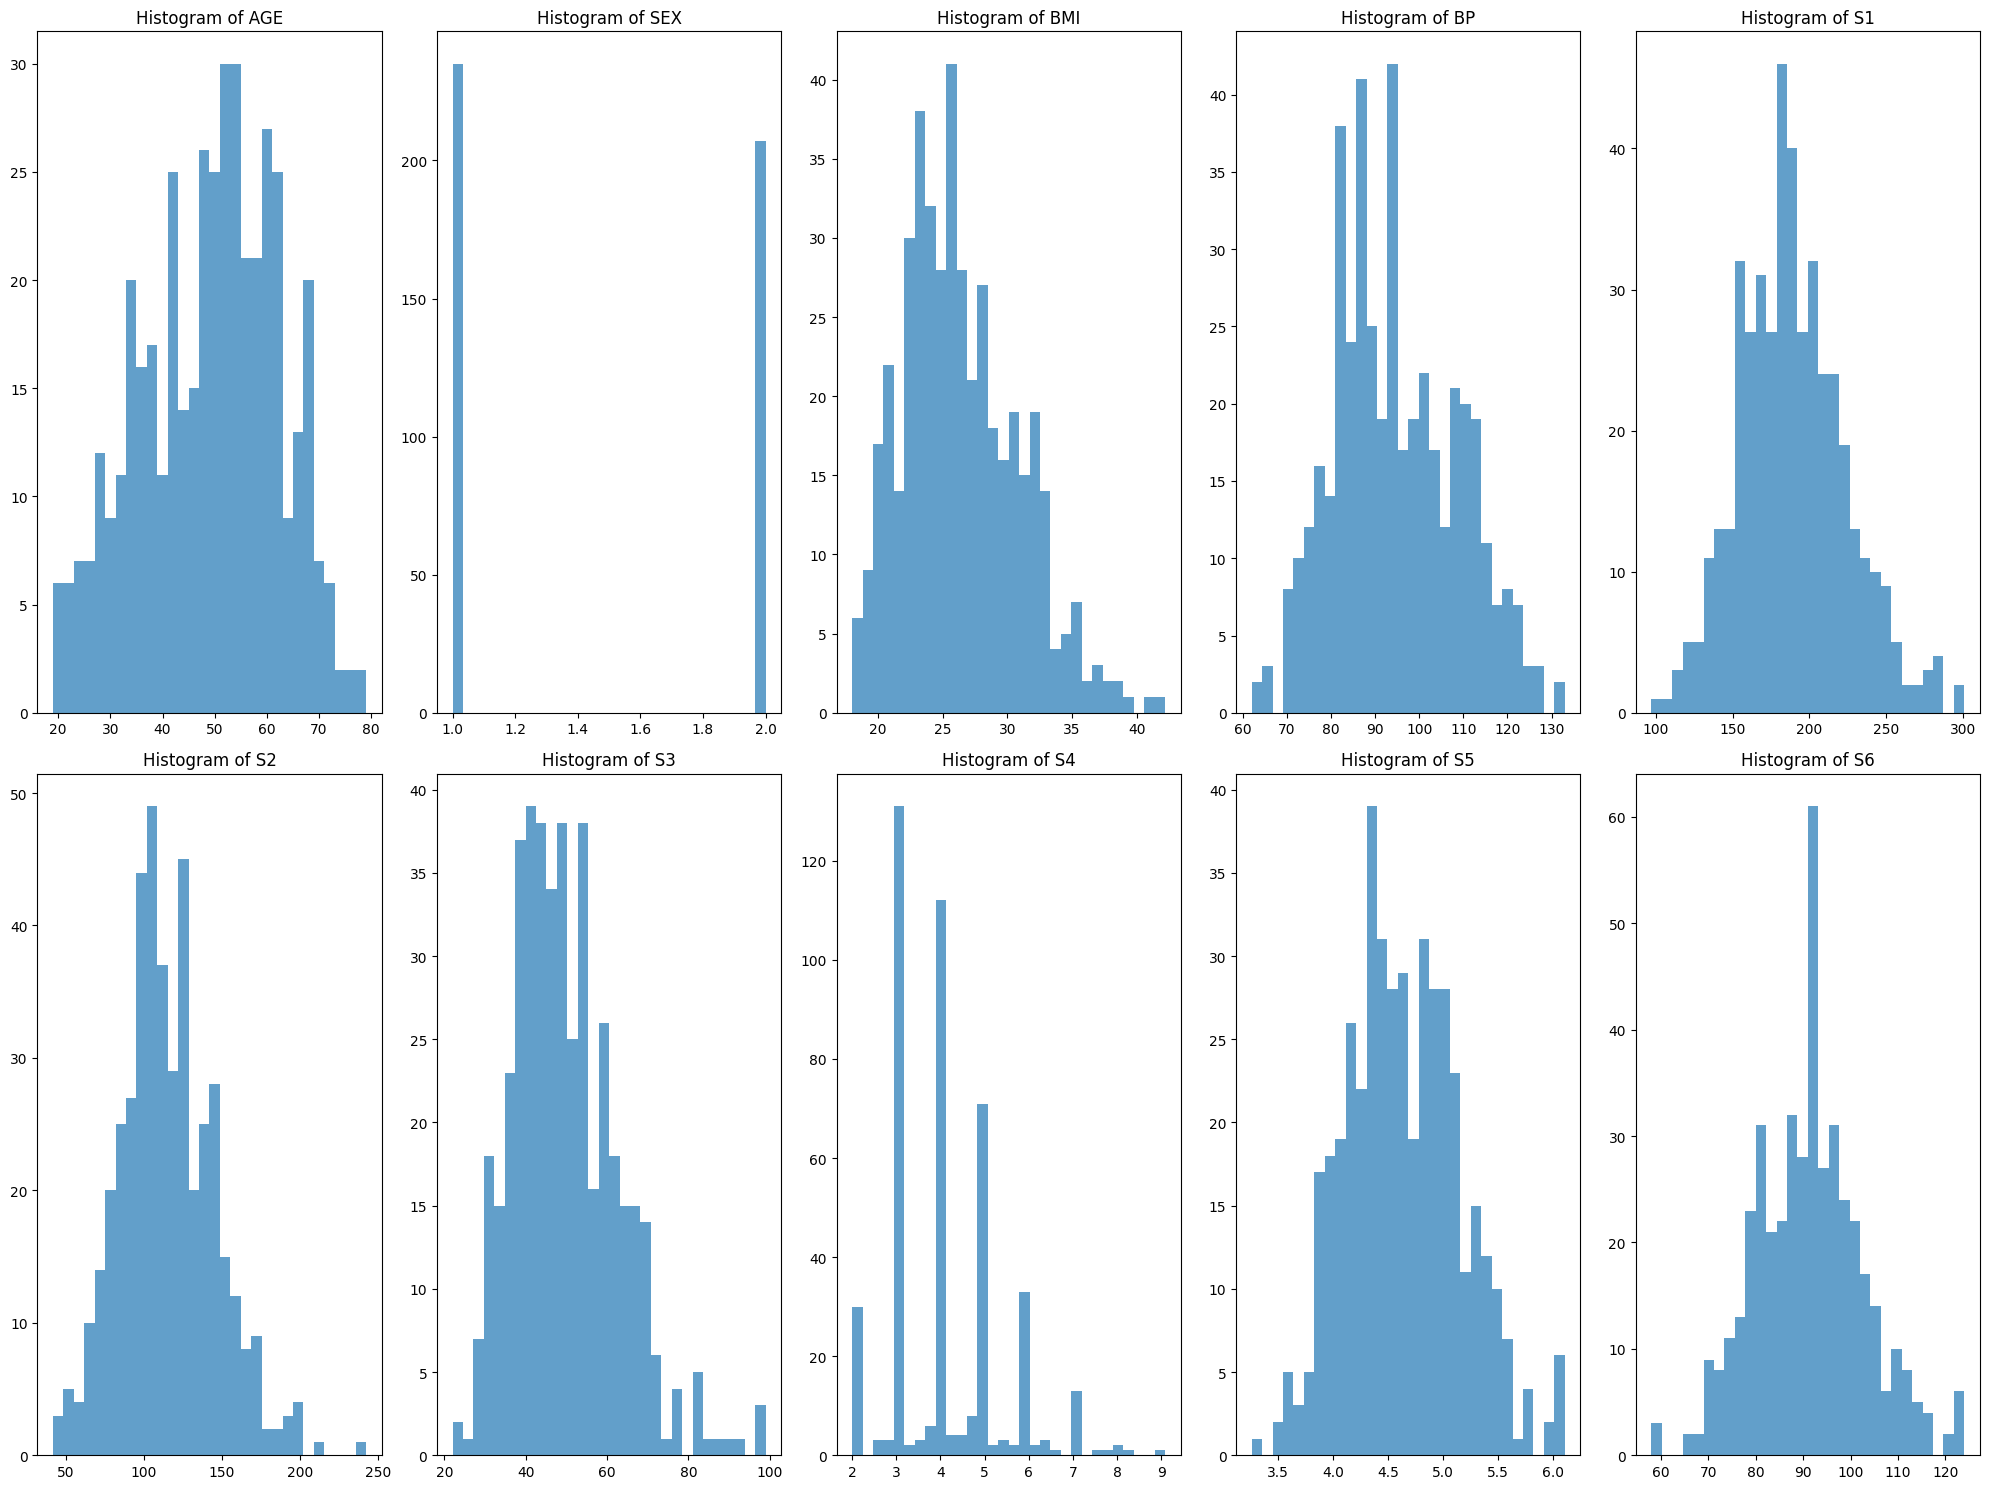

In [213]:
plt.figure(figsize=(20, 15))
for i, column in enumerate(X.columns):
    plt.subplot(2, 5, i + 1)
    plt.hist(diabetes_df[column], bins=30, alpha=0.7)
    plt.title(f"Histogram of {column}")
plt.tight_layout()
plt.show()


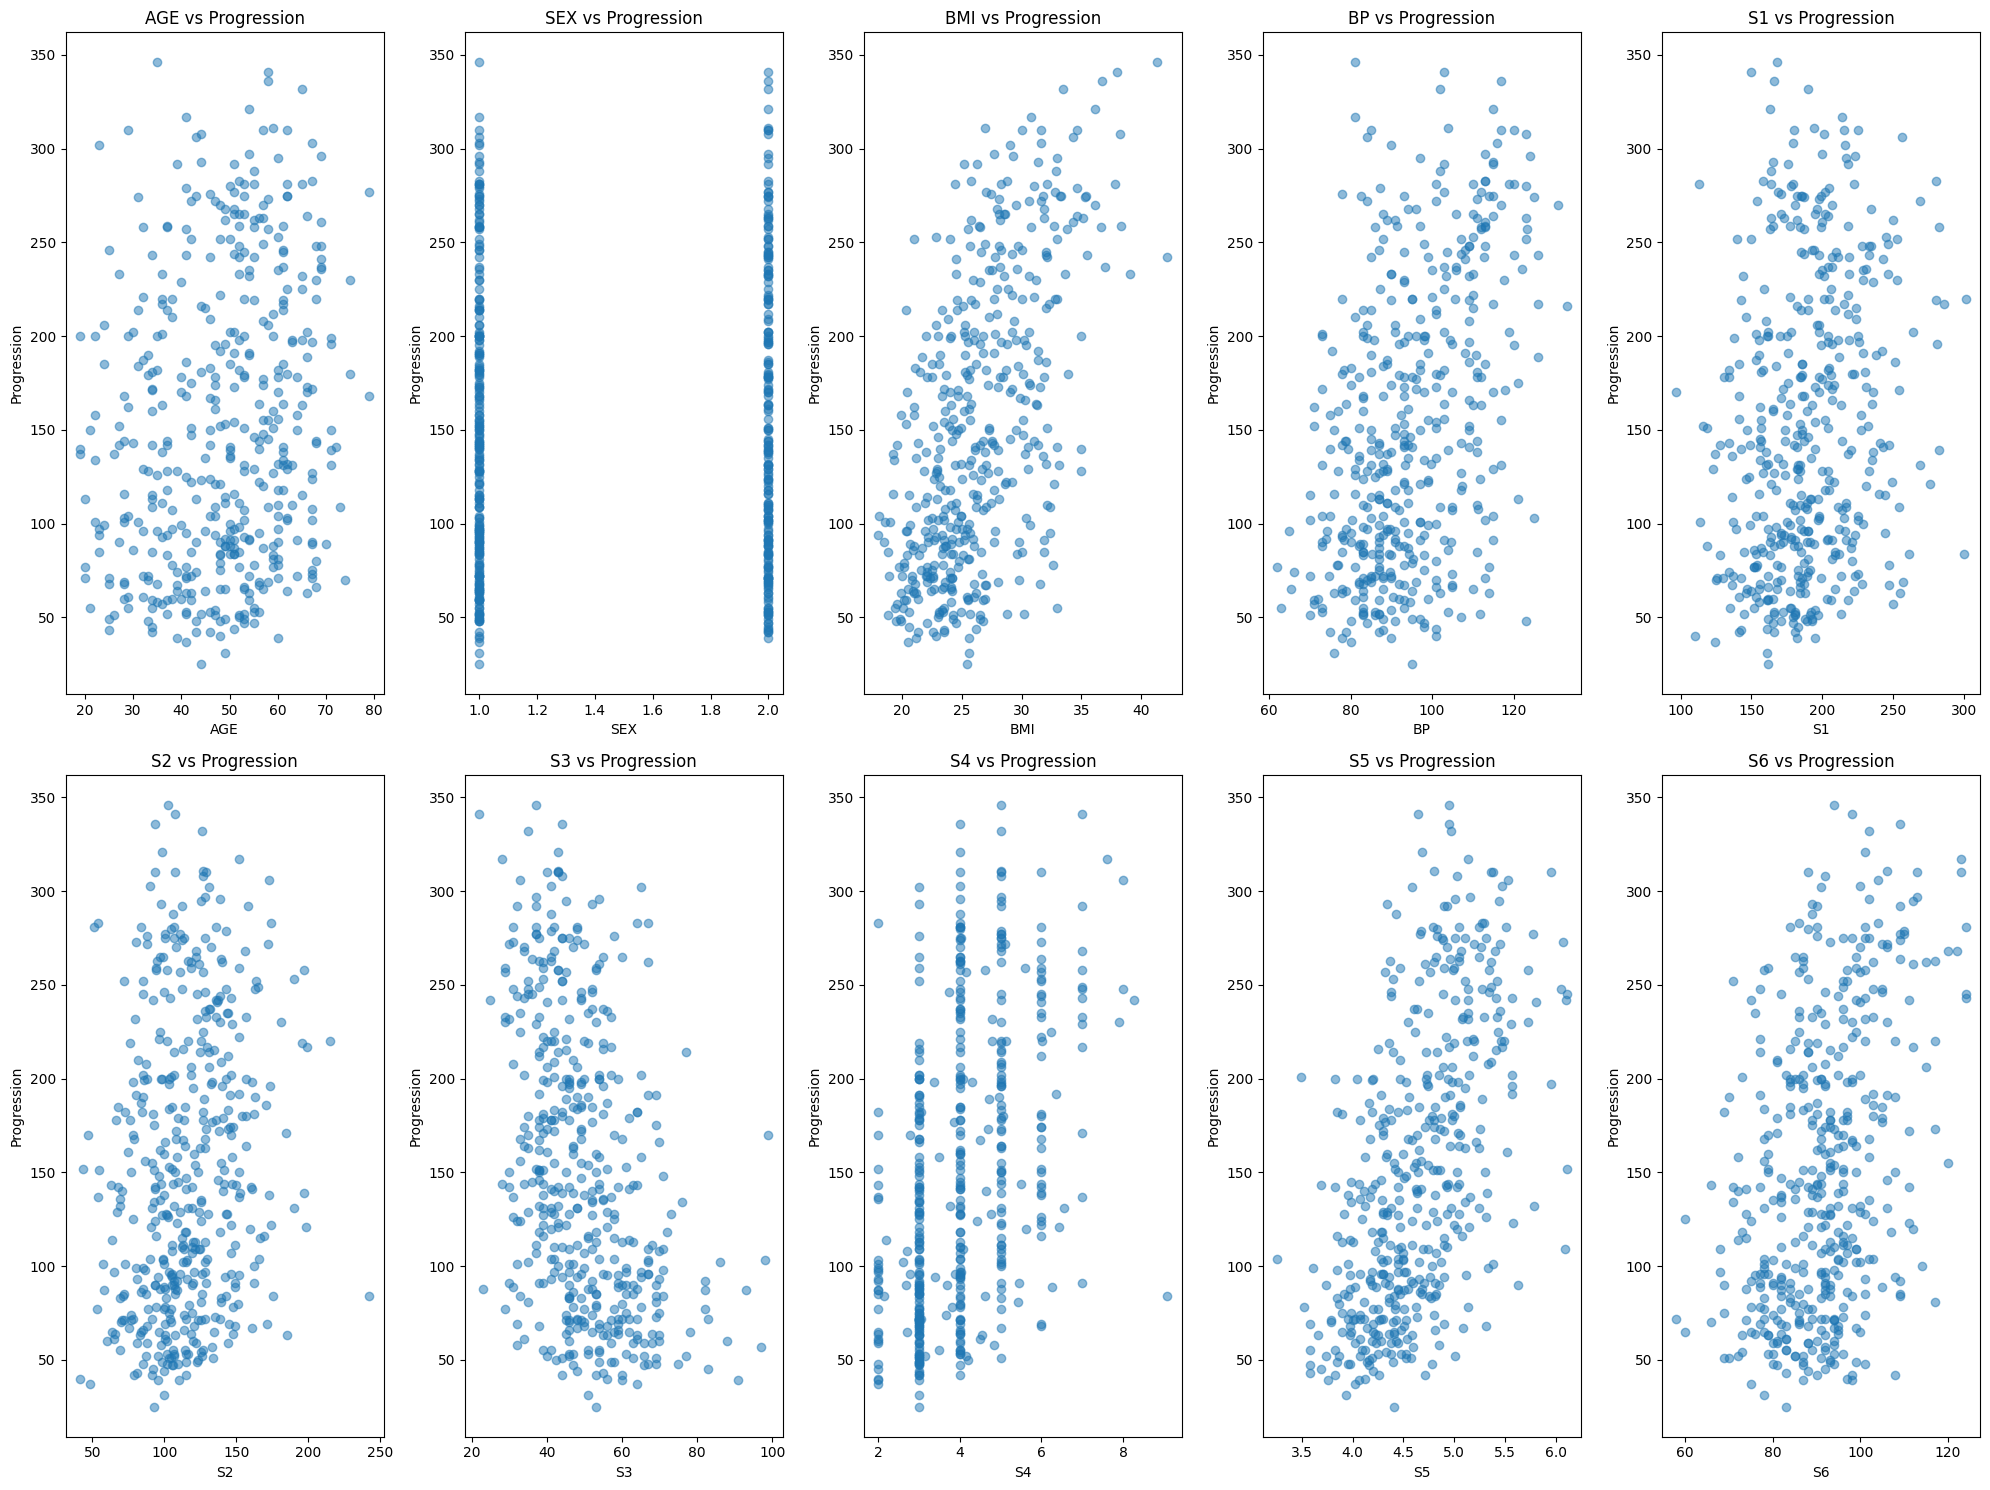

In [214]:
fig, axs = plt.subplots(2, 5, figsize=(20, 15))
axs = axs.flatten()
# Iterate over each independent variable and create a scatter plot
for i, column in enumerate(X.columns):
    axs[i].scatter(X[column], Y, alpha=0.5)
    axs[i].set_title(f"{column} vs Progression")
    axs[i].set_xlabel(column)
    axs[i].set_ylabel("Progression")
# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


Feature scaling

In [215]:
# Use StandardScaler
standard_scaler = StandardScaler()
# Fit StandardScaler on training set and transform both training and test sets
X_train_standard_scaled = standard_scaler.fit_transform(X_train)
X_test_standard_scaled = standard_scaler.transform(X_test)
# Use MinMaxScaler
min_max_scaler = MinMaxScaler()
# Fit MinMaxScaler on training set and transform both training and test sets
X_train_min_max_scaled = min_max_scaler.fit_transform(X_train)
X_test_min_max_scaled = min_max_scaler.transform(X_test)

Generate multiple linear regression model

In [216]:
# Create a multiple linear regression model
model = LinearRegression()
# Train model using training sets with StandardScaler
model.fit(X_train_standard_scaled, Y_train)
# Train model using training sets with MinMaxScaler
model.fit(X_train_min_max_scaled, Y_train)


LinearRegression()

Print intercept and coefficients


In [217]:
# Print intercept and coefficients of trained model with StandardScaler
print("Using StandardScaler:")
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)
# Print intercept and coefficients of trained model with MinMaxScaler
print("\nUsing MinMaxScaler:")
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)


Using StandardScaler:
Intercept: -25.13322785293522
Coefficients: [   8.2612689   -23.06446772  135.63561351   84.9935688  -244.80178532
  162.87932677   46.32729542   72.03113268  191.18672297   13.3055384 ]

Using MinMaxScaler:
Intercept: -25.13322785293522
Coefficients: [   8.2612689   -23.06446772  135.63561351   84.9935688  -244.80178532
  162.87932677   46.32729542   72.03113268  191.18672297   13.3055384 ]


Generate Predictions for test set



In [218]:
# Generate predictions for test set with StandardScaler
Y_pred_standard_scaled = model.predict(X_test_standard_scaled)
# Generate predictions for test set with MinMaxScaler
Y_pred_min_max_scaled = model.predict(X_test_min_max_scaled)

Calculate R-Squared

In [219]:
# Compute R-squared for model on test set with StandardScaler
r_squared_standard_scaled = r2_score(Y_test, Y_pred_standard_scaled)
print("R-squared with StandardScaler:", r_squared_standard_scaled)
# Compute R-squared for model on test set with MinMaxScaler
r_squared_min_max_scaled = r2_score(Y_test, Y_pred_min_max_scaled)
print("R-squared with MinMaxScaler:", r_squared_min_max_scaled)

R-squared with StandardScaler: -22.32035503095602
R-squared with MinMaxScaler: 0.45260276297191937


The R-squared  of -22.32035503095602 is negative, indicating that the model performs poorly and is not capturing the trend of the data at all. The R-squared  of 0.45260276297191937 is positive, suggesting that the model is explaining approximately 45.26% of the variance in the dependent variable. While this is not an excellent fit, it is significantly better than the performance with the StandardScaler.